# Иструменты на Python для анализа данных

На курсе "Введение в машинное обучение" Вам предстоит использовать для решения практических задач различные библиотеки и инструменты связанные с языком Python. Данное руководство служит для краткого введения в возможности языка и его базовые инструменты.

Для установки всего необходимого окружения советуем воспользоваться программой Anaconda [1].

## Содержание
 * [Язык Python](#Язык-Python)
 * [Оболочка IPython](#Оболочка-IPython)
 * [Блокноты Jupyter](#Блокноты-Jyputer)
 * [Источники](#Источники)

## Язык Python

Первая версия языка была разработана Гвида ван Россумом в 1991. Python является языком общего назначения, ориентированным на производительность программиста и читаемость кода.

Самый быстрый сопсоб ознакомиться с идеями этого языка - использовать пасхальное яйцо, которое распечает «The Zen of Python»

In [151]:
import this

Сам язык имеет довольно минималистичный синтаксис, а главная его сила заключается в различных библиотеках на все случаи жизни. В частности, в области анализа данных такие python библиотеки как scikit-learn, pandas, numpy, scipy, matplotlib, seaborn, theano, tensorflow, keras и lasange стали очень популярными среди исследователей.

В рамки данного пособия не получится уместить полный курс по этому языку. Поэтому будет предполагать, что читателю будет достаточно познакомиться с базовыми примерами, которые он сможет обощить на свои задачи. А за более полным изучением предлагается воспользоваться учебником [1].

### Переменные и типы
Итак, начнем с самого простого - переменные и операции. И сразу нас ждет сюрприз! В Python используется динамическая типизация. Это означает, что тип переменной не нужно задавать явно. Он вычислияется исходня из выражения в правой части.

In [152]:
number = 42
type(number)

int

In [153]:
e = 2.17
type(e)

float

In [154]:
name = "John"
type(name)

str

In [155]:
flag = True
type(flag)

bool

### Операции

In [156]:
42 + 12

54

In [157]:
5 * 4

20

In [158]:
1 - 20

-19

Важное отличие в версия языка 2 и 3 заключается в том, что в первом случае деление целых чисел по умолчание целочисленное, а для версии 3 - с плавающей точкой. Для целочисленного деление в 3-й версии языка используется специальный оператор `//`. Здесь и далее мы будет предполагать, что работаем с 3-й версией языка Python.

In [159]:
%%python2
print(10/4)

2


In [160]:
10/4

2.5

In [161]:
10//4

2

К большой радости исследователей в данном языке есть оператор возведения в степень и комплексные числа. Поскольку имя пременной `i` в программировании традиционо закреплено за параметром цикла, то для обозначения мнимых чисел используется суффикс `j`

In [162]:
2**8

256

Напомним читателю формулу Эйлера для представления комплексных чисел
$$
    e^{i\phi} = \cos \phi + i\sin\phi,
$$
из которой как следствие вытакеат интересное равенство, которое связывает между собой такие популярные математические константы как $\pi$, $e$, $i$, $1$ и $0$.
$$
    e^{i\pi} + 1 = 0.
$$

In [4]:
from math import e, pi
from cmath import isclose

isclose(e**(1j*pi) + 1, 0, abs_tol=1e-9)

True

### Управляющие конструкции

Рассмотрим несколько примеров задач, которые позволят нам продемонстрировать применение таких управляющих конструкций как ветвления и циклы.

### Квадратное уравнение

In [164]:
from math import sqrt

def solve_sqreq(a, b, c):
    if isclose(a, 0):
        if isclose(b, 0):
            return None
        else:
            return -c/b
    else:
        D = b**2 - 4*a*c
        if isclose(D, 0):
            return -b/(2*a)
        elif D < 0:
            return None
        else:
            return (-b - sqrt(D))/(2*a), (-b + sqrt(D))/(2*a)

In [165]:
solve_sqreq(0, 1, 2)

-2.0

In [166]:
solve_sqreq(0, 0, 1)

In [167]:
solve_sqreq(1, 2, 1)

-1.0

In [168]:
solve_sqreq(1, 3, 2)

(-2.0, -1.0)

### Формула Герона
Это один из простых способов вычисления квадратного корня. Рассмотрим реекурентную последовательность $a_n$
$$
    a_{n+1} = \frac{1}{2}\left(a_{n} + \frac{a}{a_n}\right).
$$

Можно показать, что 
$$
    \lim_{n \to \infty} a_n = \sqrt{a}.
$$

Доказательство этого факта оставим на усмотрение чистателя.

In [5]:
def sqrt(a):
    if a < 0:
        raise ArithmeticError
    if isclose(a, 0):
        return 0
    a_prev = 0
    a_curr = 1
    while not isclose(a_prev, a_curr):
        a_prev = a_curr
        a_curr = 1/2*(a_curr + a/a_curr)   
    return a_curr

In [6]:
sqrt(0)

0

In [7]:
sqrt(1)

1.0

In [8]:
sqrt(2)

1.414213562373095

In [9]:
sqrt(-4)

ArithmeticError: 

### Числа Фибоначчи

Данная реккурентная последовательность описывает популяцию пар кроликов на острове [?].
$$
    F_{n} = F_{n-1} + F_{n-2}, \quad F_0 = 1, F_1 = 1.
$$

In [11]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
def fib(n):
    f_prev = 1
    f_curr = 1
    for i in range(n):
        f_next = f_prev + f_curr
        f_prev = f_curr
        f_curr = f_next
    return f_prev

### Генераторы списков
Интересный синтаксический элемент языка заключается в возможности генерировать списки с помощью выражений.

In [14]:
fibs = []
for i in range(15):
    fibs.append(fib(i))
fibs

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

In [174]:
[fib(i) for i in range(15)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

### Срезы
При работе с массивами часто возникает необходимость взять некоторый подмассив.

In [15]:
fib_numbers = [fib(i) for i in range(100)]

Первые 10

In [16]:
fib_numbers[:10]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Последние 5

In [17]:
fib_numbers[-5:]

[51680708854858323072,
 83621143489848422977,
 135301852344706746049,
 218922995834555169026,
 354224848179261915075]

От 10-го до 15-го

In [18]:
fib_numbers[10:15]

[89, 144, 233, 377, 610]

In [19]:
fib_numbers[10:20:2]

[89, 233, 610, 1597, 4181]

### Составные типы данных

Нам осталось познакомиться с такими базовыми типами как кортежи, списки и словари.

### Кортежи
Представляют собой упорядоченный набор значений, который нельзя изменять (доабвлять или удалять элементы). Его очень удобно использовать для того, чтобы возвращать сразу несколько значений. Рассмотрим пример алгоритм, который должен возвращать сразу несколько значений.

### Расширенный алгоритм Евклида

На вход: два целых числа $a$ и $b$
На выходе: наибольший общий делитель $d = gcd(a, b)$ и $x, y : ax+by = d$.

In [179]:
def egcd(a, b):
    if b == 0:
        return (a, 1, 0) # Возвращаем кортеж из 3-х значений
    x2 = 1
    x1 = 0
    y2 = 0
    y1 = 1
    while b > 0:
        q = a % b
        r = a - q*b
        x = x2 - q*x1
        y = y2 - q*y1
        
        a = b
        b = r
        x2 = x1
        x = x1
        y2 = y1
        y = y1

    return (a, x, y)

In [180]:
a = 169
b = 39
d, x, y = egcd(a, b) # сразу раскладываем элементы кортежа по переменным
a*x + b*y == d

True

## Списки

Одна из главных рабочих лошадок. Умеет не только хранить произвольные значение, но и добавлять новые, либо удалять ненужные.

In [20]:
digits = [1, 2, 3]
digits

[1, 2, 3]

In [182]:
digits.append(4)
digits

[1, 2, 3, 4]

In [183]:
digits.pop()
digits

[1, 2, 3]

In [184]:
digits.insert(1, 7)
digits

[1, 7, 2, 3]

In [185]:
digits.pop(0)
digits

[7, 2, 3]

In [186]:
len(digits)

3

### Словари

В случае, когда мы хотим в качестве индексов использовать что-то отличное от числе, например строки, то на помощь нам приходит встроенный тип `dict`.

In [21]:
boarding_pass = {
    'passanger': 'John Smith',
    'from': 'Moscow',
    'to': 'Khabarovsk',
    'flight': 'SU42',
    'fare': 1045.67,
    'seat': '12D',
    'gate': 22,
}

Кто летит

In [22]:
boarding_pass['passanger']

'John Smith'

Нужно сменить шлюз посадки

In [23]:
boarding_pass['gate'] = 23

In [24]:
boarding_pass

{'fare': 1045.67,
 'flight': 'SU42',
 'from': 'Moscow',
 'gate': 23,
 'passanger': 'John Smith',
 'seat': '12D',
 'to': 'Khabarovsk'}

Нужно добавить информацию об дате вылета

In [190]:
boarding_pass['date'] = '10DEC16'

Нужно удалить информацию об месте

In [191]:
boarding_pass.pop('seat')
boarding_pass

{'date': '10DEC16',
 'fare': 1045.67,
 'flight': 'SU42',
 'from': 'Moscow',
 'gate': 23,
 'passanger': 'John Smith',
 'to': 'Khabarovsk'}

## Оболочка IPython

В отличии от стандартной оболочки python, предлагается сразу рассмотреть более навороченный вариант под названием IPython за его разннобразные удобные плюшки.

Например, автоматически записывать все результаты вычислений в переменные \_N, где N - номер вывода Out[N].

In [25]:
97*100

9700

In [26]:
# Переменная с именем _192 будет содержать 9700
_25 + 12

9712

Следующей приятной особенностью является наличие автодополнения по клавише Tab и встроенные подсказки по функциям, которые можно вывести с помощью символа ?

In [28]:
len?

In [27]:
isclose?

В арсенале IPython имеется внушительный набор магических команд, которые не относятся к языку python и начинаются с символа `%`. Их полный список можно посмотреть с помощью команды `%lsmagic`.

In [208]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

Мы же остановимся только не некоторых примерах. Так команда `%timeit` позволяет оценить время выполнения выражения путем его многократного выполнения и замера времени.

In [210]:
%timeit sqrt(123)

100000 loops, best of 3: 3.41 µs per loop


Иногда для понимания работы функции недостаточно краткой документации, которую можно получить с помощью ?. Тогда нужно смотреть исходный код, который IPython может легко отобразить с помощью команды `%psource`.

In [29]:
%psource sqrt

Очень полезной командой является `%pylab`, которая подгружает несколько очень полезных для численных расчетов библиотек (numpy, matplotlib, scipy). И задает режим отображения графиков с помощью своего параметра. В качестве режима предлагается использовать `inline`.

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'sqrt', 'pi', 'isclose']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


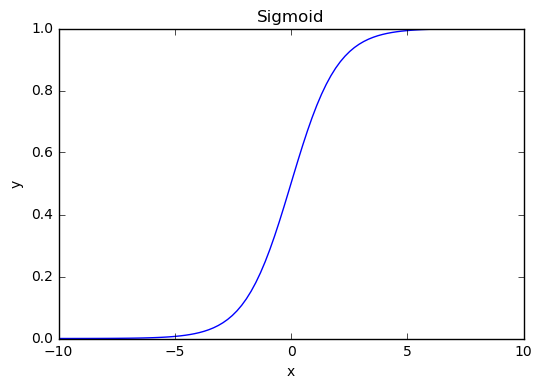

In [32]:
x = numpy.linspace(-10, 10, 100)
y = 1/(1 + numpy.exp(-x))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')

Для рисования графиков обычно используют библиотеку matplotlib[?], которая обладает очень большими возможностями по визуализации.

В качестве примера рассмотрим один забавный стиль отрисовки xkcd

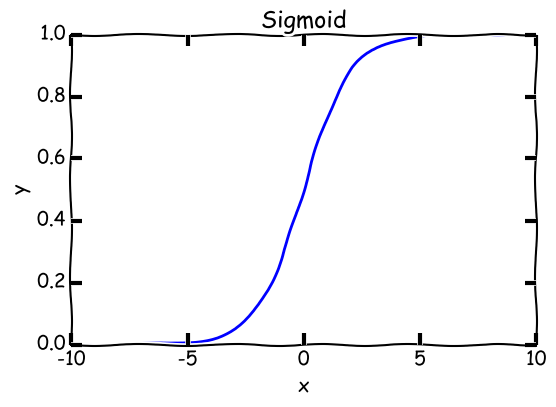

In [33]:
plt.xkcd()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')

## Блокноты Jyputer

И наконец мы добрались до описания Jupyter. На сомом деле описывать возможности этого инструмента уже нет необходимости. Ведь именно в нем вы и читаете это руководство. Именно Jupyter позволяет запустить в браузере среду, в которой мы можем взаимодействовать с оболочкой IPython и видеть в одном документе как отформатированный в разметке Markdown текст с поддержкой формул в формате $\LaTeX$, исходный код на языке `python`, который можно отредоактировать и повторно запустить без необходимости выполнять весь код до этого, мы видим результаты тех вычислений, которые представляют интерес, а также нарисованные нами графике. Получается 4 в одном: отформатированное описание, код, результат выполнения кода и графики. Возможность соединить все это в одном файле и предоставляет нам Jupyter. 

Любопытно, что его название состоит из 3-х языков программирования Julia[?], Python и R[?]. Каждый из которых завоевал определенную популярность в среде исследователей данных. В данном курсе нам не потребуются значния Juliad или R, но любознательный чистатель найдет в списке источников ссылки на материалы, по которым с этими языками можно познакомиться.

## Источники

[1]: https://www.continuum.io/downloads
1. **Лутц М.** Изучаем Python, 4-е издание
1. https://www.python.org
1. Курс "Математика и Python для анализа данных" - https://www.coursera.org/learn/mathematics-and-python
1. https://ipython.org
1. http://jupyter.org
1. Jupyter/IPython Notebook Quick Start Guide - https://jupyter-notebook-beginner-guide.readthedocs.io
1. https://www.r-project.org
1. http://julialang.org
